## 1. Import Dependencies & Setup

In [1]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## 2. Load & Scale Data

In [3]:
data=tf.keras.utils.image_dataset_from_directory('food-cl',image_size=(350,350))

Found 431 files belonging to 3 classes.


In [4]:
classnames=data.class_names

In [5]:
data_iterator=data.as_numpy_iterator()

In [6]:
batch=data_iterator.next()

In [7]:
batch[0]

array([[[[ 50.      ,  44.      ,  44.      ],
         [ 49.      ,  43.      ,  43.      ],
         [ 48.      ,  42.      ,  42.      ],
         ...,
         [ 75.28577 ,  54.285767,  49.285767],
         [ 75.2552  ,  54.255203,  49.255203],
         [ 73.92863 ,  52.92863 ,  47.92863 ]],

        [[ 49.      ,  43.      ,  43.      ],
         [ 47.39449 ,  41.39449 ,  41.39449 ],
         [ 47.      ,  41.      ,  41.      ],
         ...,
         [ 73.72342 ,  52.72342 ,  47.72342 ],
         [ 72.78026 ,  51.78026 ,  46.78026 ],
         [ 71.88568 ,  50.885685,  45.885685]],

        [[ 46.      ,  40.      ,  40.      ],
         [ 46.      ,  40.      ,  40.      ],
         [ 46.      ,  40.      ,  40.      ],
         ...,
         [ 73.7704  ,  52.7704  ,  47.7704  ],
         [ 72.862236,  51.862236,  46.862236],
         [ 72.      ,  51.      ,  46.      ]],

        ...,

        [[ 80.      ,  55.      ,  50.      ],
         [ 79.      ,  54.      ,  49.      ]

In [8]:
print(len(batch))
print(batch[0].shape)
print(batch[1])

2
(32, 350, 350, 3)
[2 0 2 1 2 1 0 0 2 1 2 0 0 1 2 2 2 2 2 1 2 2 0 0 0 2 1 2 2 0 1 2]


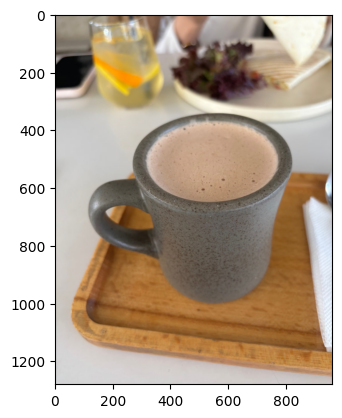

In [9]:
img=cv2.imread(os.path.join('food-cl','drink','photo_2_2024-05-24_11-58-22.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

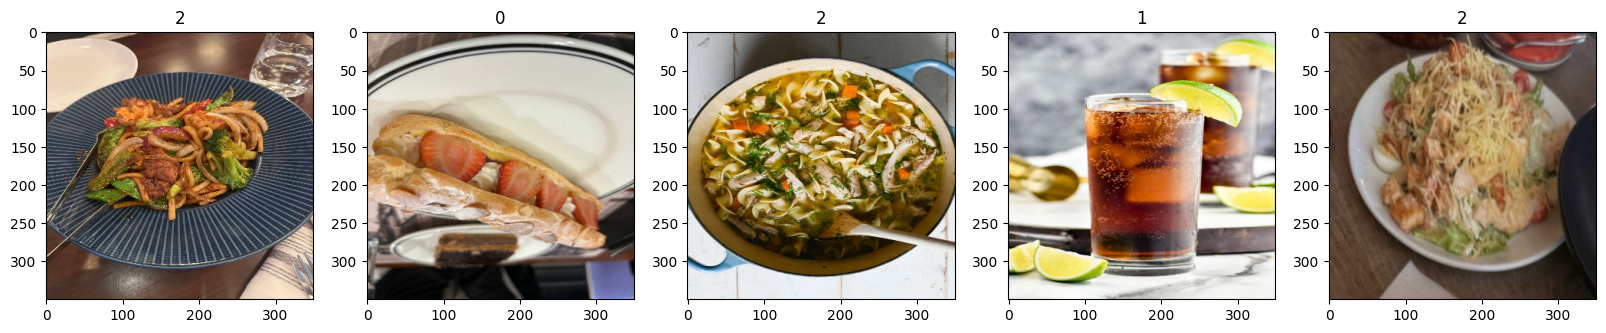

In [10]:
fig, ax=plt.subplots(ncols=5,figsize=(20,20))
for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data=data.map(lambda x,y: (x/255,y))

In [12]:
data_iterator=data.as_numpy_iterator()

In [13]:
batch=data_iterator.next()

In [14]:
batch[0]

array([[[[5.06459355e-01, 4.94694680e-01, 4.59400564e-01],
         [5.06459355e-01, 4.94694680e-01, 4.59400564e-01],
         [5.06459355e-01, 4.94694680e-01, 4.59400564e-01],
         ...,
         [1.25966385e-01, 1.29887953e-01, 1.06358550e-01],
         [1.29697546e-01, 1.33619115e-01, 1.10089712e-01],
         [1.33333340e-01, 1.37254909e-01, 1.13725491e-01]],

        [[5.09803951e-01, 4.98039216e-01, 4.62745100e-01],
         [5.09803951e-01, 4.98039216e-01, 4.62745100e-01],
         [5.09803951e-01, 4.98039216e-01, 4.62745100e-01],
         ...,
         [1.25966385e-01, 1.29887953e-01, 1.06358550e-01],
         [1.29697546e-01, 1.33619115e-01, 1.10089712e-01],
         [1.33333340e-01, 1.37254909e-01, 1.13725491e-01]],

        [[5.09803951e-01, 4.98039216e-01, 4.62745100e-01],
         [5.09803951e-01, 4.98039216e-01, 4.62745100e-01],
         [5.09803951e-01, 4.98039216e-01, 4.62745100e-01],
         ...,
         [1.25966385e-01, 1.29887953e-01, 1.06358550e-01],
         [

In [15]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


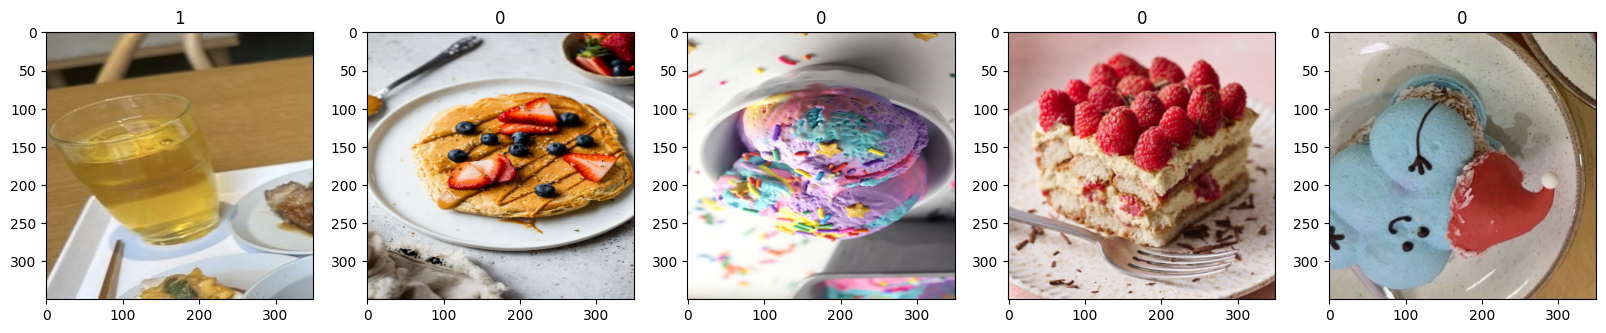

In [16]:
fig, ax=plt.subplots(ncols=5,figsize=(20,20))
for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [17]:
len(data)

14

## 3. Split Data

In [18]:
train=data.take(9)
val=data.skip(9).take(3)
test=data.skip(12).take(2)

In [19]:
for images, labels in train.take(1):
    print("Image shape:", images.shape)
    print("Image min/max values:", tf.reduce_min(images).numpy(), tf.reduce_max(images).numpy())
    print("Labels shape:", labels.shape)
    print("Unique labels:", np.unique(labels))

Image shape: (32, 350, 350, 3)
Image min/max values: 0.0 1.0
Labels shape: (32,)
Unique labels: [0 1 2]


## 4. Building the CNN & Training

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Input
from tensorflow.keras.optimizers import Adam

In [21]:
tf.keras.backend.clear_session()

model = Sequential()

model.add(Input(shape=(350,350,3)))

model.add(Conv2D((16), (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D((32), (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D((64), (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense((256), activation='relu'))
model.add(Dense((3), activation='softmax'))

adam=Adam(learning_rate=0.001,clipnorm=1.0)
model.compile(optimizer=adam, loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 175, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 87, 87, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 43, 43, 64)       0

In [22]:
logdir = 'logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [25]:
history = model.fit(train, epochs = 30, validation_data = val, callbacks = [tensorboard_callback, early_stopping])

Epoch 1/30
9/9 [==============================] - 10s 385ms/step - loss: 4.1503 - accuracy: 0.3750 - val_loss: 0.9140 - val_accuracy: 0.5208
Epoch 2/30
9/9 [==============================] - 4s 338ms/step - loss: 0.8614 - accuracy: 0.5625 - val_loss: 0.8753 - val_accuracy: 0.5312
Epoch 3/30
9/9 [==============================] - 4s 335ms/step - loss: 0.7118 - accuracy: 0.6736 - val_loss: 0.4901 - val_accuracy: 0.8438
Epoch 4/30
9/9 [==============================] - 3s 306ms/step - loss: 0.4925 - accuracy: 0.8472 - val_loss: 0.5420 - val_accuracy: 0.7500
Epoch 5/30
9/9 [==============================] - 3s 319ms/step - loss: 0.3531 - accuracy: 0.8681 - val_loss: 0.4536 - val_accuracy: 0.8021
Epoch 6/30
9/9 [==============================] - 3s 329ms/step - loss: 0.2463 - accuracy: 0.9097 - val_loss: 0.2167 - val_accuracy: 0.9167
Epoch 7/30
9/9 [==============================] - 3s 320ms/step - loss: 0.1429 - accuracy: 0.9549 - val_loss: 0.1233 - val_accuracy: 0.9583
Epoch 8/30
9/9 [===

In [26]:
history.history

{'loss': [4.15025520324707,
  0.8613504767417908,
  0.7118009924888611,
  0.4925221800804138,
  0.35311660170555115,
  0.24627314507961273,
  0.14291074872016907,
  0.08538667112588882,
  0.05182243138551712,
  0.02546267956495285,
  0.026606999337673187,
  0.028383757919073105,
  0.019481228664517403,
  0.003983533475548029,
  0.0027570973616093397,
  0.012750964611768723],
 'accuracy': [0.375,
  0.5625,
  0.6736111044883728,
  0.8472222089767456,
  0.8680555820465088,
  0.9097222089767456,
  0.9548611044883728,
  0.9722222089767456,
  0.9826388955116272,
  0.9965277910232544,
  0.9965277910232544,
  0.9895833134651184,
  0.9965277910232544,
  1.0,
  1.0,
  0.9930555820465088],
 'val_loss': [0.9139666557312012,
  0.8753463625907898,
  0.490072101354599,
  0.5419577956199646,
  0.45364391803741455,
  0.21665449440479279,
  0.12326362729072571,
  0.09209015220403671,
  0.02607935480773449,
  0.0212074164301157,
  0.0026662712916731834,
  0.007868442684412003,
  0.007344882935285568,
  0

## 5. Plot Performance & Evaluation

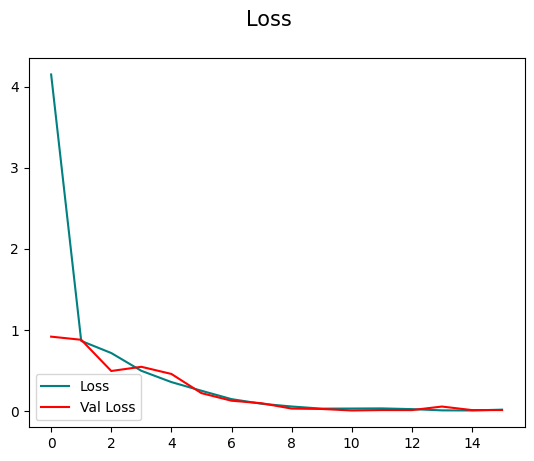

In [27]:
fig= plt.figure()
plt.plot(history.history['loss'], color='teal', label='Loss')
plt.plot(history.history['val_loss'], color='red', label='Val Loss')
fig.suptitle('Loss', fontsize=15)
plt.legend(loc='lower left')
plt.show()

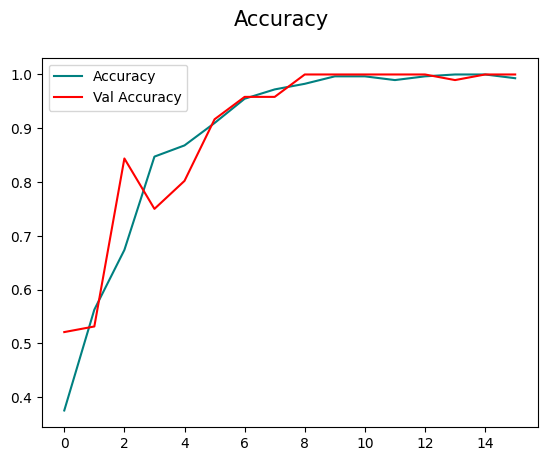

In [28]:
fig= plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='Val Accuracy')
fig.suptitle('Accuracy', fontsize=15)
plt.legend(loc='upper left')
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pr = Precision()
re = Recall()
ca = CategoricalAccuracy()

In [30]:
for batch in  test.as_numpy_iterator():
    X, y = batch
    yhat= model.predict(X)
    y = tf.one_hot(y, depth=3) #apply one hot encoding so that only one column has a value of 1 and the rest is 0
    pr.update_state(y,yhat)
    re.update_state(y,yhat)
    ca.update_state(y,yhat)

1/1 [==============================] - 0s 474ms/step


In [31]:
print(y.shape,yhat.shape)

(15, 3) (15, 3)


In [32]:
print(pr.result().numpy(),re.result().numpy(),ca.result().numpy())

1.0 1.0 1.0


1/1 [==============================] - 0s 48ms/step


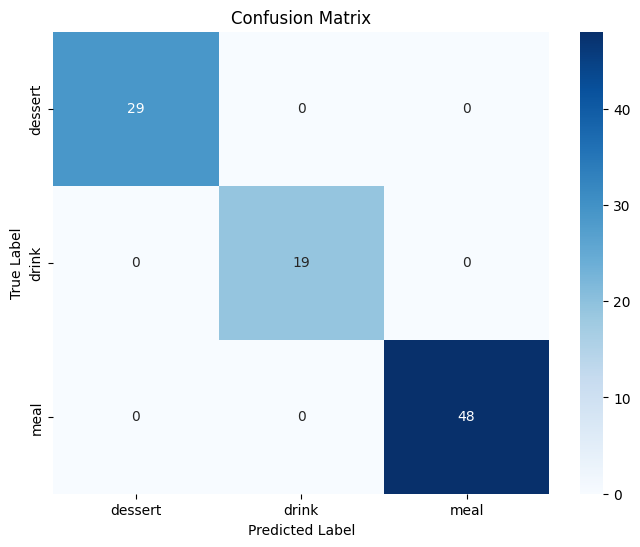

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

val_labels = []
val_preds = []
class_names=classnames

for batch in val.as_numpy_iterator():
    X_val, y_val = batch
    val_labels.extend(y_val)
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    val_preds.extend(y_pred_classes)

# Calculate confusion matrix
cm = confusion_matrix(val_labels, val_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 6. Model Testing

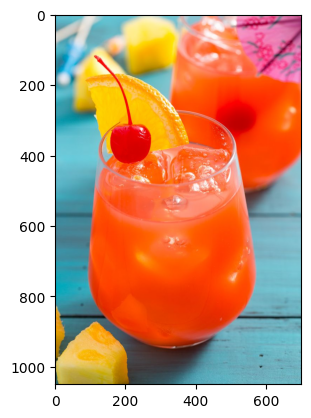

In [34]:
img = cv2.imread("R (1).jpeg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

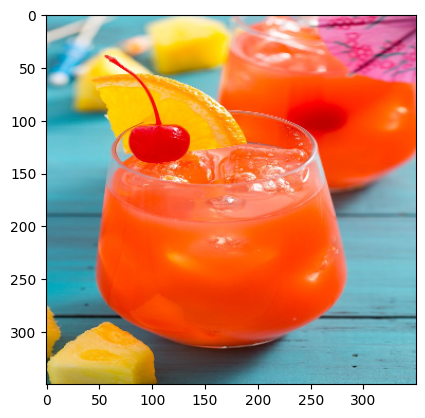

In [35]:
resize=cv2.resize(img,(350,350))
plt.imshow(cv2.cvtColor(resize,cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
resize.shape

(350, 350, 3)

In [37]:
resize=np.expand_dims(resize,0)

In [38]:
resize=resize/255.0

In [39]:
yhat_test=model.predict(resize)

1/1 [==============================] - 0s 184ms/step


In [40]:
yhat_test

array([[4.4008065e-03, 9.9559170e-01, 7.5305411e-06]], dtype=float32)

In [41]:
pred_class = np.argmax(yhat_test, axis=1)
if pred_class[0]==0:
    print('Predicted class is Dessert.')
elif pred_class[0]==1:
    print('Predicted class is Drink.')
else: 
    print('Predicted class is Meal.')

Predicted class is Drink.


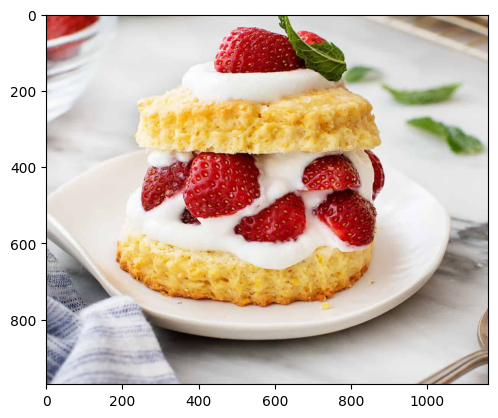

In [42]:
img = cv2.imread("R.jpeg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

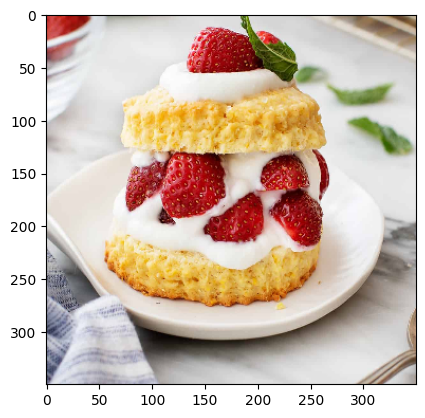

In [43]:
resize=cv2.resize(img,(350,350))
plt.imshow(cv2.cvtColor(resize,cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
resize=np.expand_dims(resize,0)

In [45]:
resize=resize/255.0

In [46]:
yhat_test=model.predict(resize)

1/1 [==============================] - 0s 23ms/step


In [47]:
pred_class = np.argmax(yhat_test, axis=1)
if pred_class[0]==0:
    print('Predicted class is Dessert.')
elif pred_class[0]==1:
    print('Predicted class is Drink.')
else: 
    print('Predicted class is Meal.')

Predicted class is Dessert.


## 7. Saving & Loading

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('models','food_classification.h5'))

In [50]:
new_model= load_model(os.path.join('models','food_classification.h5'))

In [51]:
new_model.predict(resize)

1/1 [==============================] - 0s 69ms/step


array([[9.7746754e-01, 2.2527166e-02, 5.2051782e-06]], dtype=float32)